<a href="https://colab.research.google.com/github/PosgradoMNA/IAyAA_Equipo_64/blob/main/MNA_IAyAA_semana_6_Actividad_Equipo64_Ejercicio5_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Andres Javier Galindo Vargas - A01793927
*   Diego Alberto Olarte Mira - A01794028
*   Fredy Reyes Sanchez - A01687370
*   Jose Antonio Saenz Ramirez - A01793884
*   Roberto Vega Alanis - A01378921


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt 
import seaborn as sns 

# Para hacer las particiones
from sklearn.model_selection import train_test_split

# Objetos de orquestación
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Objectos de limpieza y preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer

# Modelos a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Elementos para las métricas
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

# Curvas de aprendizaje y validación
from sklearn.model_selection import learning_curve, validation_curve

import os

#**Ejercicio-1.** 

1. Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

In [ ]:
# se descargar el archivo del sitio  https://archive.ics.uci.edu/ml/machine-learning-databases/00522/
# se sube a la ruta a repositorio GitHub del equipo y se hace la lectura del archivo.
df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/IAyAA_Equipo_64/main/Actividad_Semana_6/Dataset/SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
# realiza el cambio a los nombres de las columnas del dataframe df - Ingles
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las
variables de entrada y a la variable Y como la variable de salida.

In [ ]:
# creacion de los conjunto de datos entrenamiento y pruba

# Valores en X
X = df.iloc[:,0:20]
# Valores en Y valor objetivo
y = df.iloc[:, -1]

# Datos de validación, función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)

In [ ]:
# Valores X
X_train.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
548,2,12,2,0,1007,4,3,4,4,1,1,1,22,3,2,1,3,2,1,2
335,1,24,2,2,1747,1,2,4,3,2,1,2,24,3,2,1,2,2,1,1
793,1,12,2,6,795,1,2,4,2,1,4,2,53,3,2,1,3,2,1,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2
295,4,36,2,1,8133,1,3,1,2,1,2,2,30,1,2,1,3,2,1,2


In [ ]:
# Valores y
y_train.head()

548    1
335    1
793    0
848    0
295    1
Name: credit_risk, dtype: int64

In [ ]:
# verificacion del dataframe
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:
* Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
*  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable.
* Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar.

In [ ]:
# categorización de variables
categorical = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','property','other_installment_plans','housing']
discretized_numerical = ['employment_duration', 'installment_rate','present_residence','number_credits','job']
binary = ['people_liable','telephone','foreign_worker']
numeric = ['duration','amount','age']


# status -- >  discretized_numerical
# savings --> discretized_numerical


# personal_status_sex` --> transform ?


Análisis de valores numéricos

In [ ]:
df[numeric].describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


Podemos observar una diferencia muy grande entre los rangos de los distintos campos numéicos, por lo tanto, para evitar una influencia desigual de los coasionada por la diferentes unidades de medida de cada uno, es necesario escalar dichos atributos.

In [ ]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = numeric

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = categorical + discretized_numerical + binary

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = categorical + binary


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                                        remainder='passthrough')

Justificación:
+ Se realiza una imputación de la media de cada columna que contiene valores numéricos ya que así se evita que se genere un sesgo en la distribución original de los datos.
+ Se realiza una imputación de la media de cada columna que contiene valores categóricos y binarios ya que es el valor que afectaría menos la distribución de los datos sin generar sesgos notables en valores que no son inherentemente numéricos.
+ Se realiza OneHotENcoding con el fin de evitar una jerarquización de los valores binarios, es decir, con el fin de evitar que una clase tenga mayor valor (influencia) sobre la otra por la magnitud del valor numérico asignado.

#**Ejercicio-4.**

## Funciones de score

In [ ]:
def mi_accuracy(y_real,y_pred):
  cm = confusion_matrix(y_real,y_pred)
  a = (cm[0,0]+cm[1,1])/(cm.sum())
  return a

In [ ]:
def mi_precision(y_real,y_pred):
  cm = confusion_matrix(y_real,y_pred)
  p = cm[1,1]/(cm[1,1]+cm[0,1])
  return p

In [ ]:
def mi_recall(y_real,y_pred):
  cm = confusion_matrix(y_real,y_pred)
  r = cm[1,1]/(cm[1,1]+cm[1,0])
  return r

In [ ]:
def mi_f1_score(y_real,y_pred):
  cm = confusion_matrix(y_real,y_pred)
  f1 = 2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0])
  return f1

In [ ]:
def mi_gmean(y_real,y_pred):
  cm = confusion_matrix(y_real,y_pred)
  r = cm[1,1]/(cm[1,1]+cm[1,0])
  e = cm[0,0]/(cm[0,0]+cm[0,1])
  g = (r*e)**(1/2)
  return g

## Lista de modelos

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression())
  nombres.append('Regresión Logística')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('Árbol de Decisión')
  
  # RF - Árbol de Decisión:
  modelos.append(RandomForestClassifier())
  nombres.append('Bosque Aleatorio')

  return modelos, nombres

## Validación cruzada (parámetros estándar)

In [ ]:
# Parámetros
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  mi_kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state= 7)
  mismetricas = {'accuracy':make_scorer(mi_accuracy),
                 'precision':make_scorer(mi_precision),
                 'recall':make_scorer(mi_recall),
                 'f1_score':make_scorer(mi_f1_score),
                 'gmean':make_scorer(mi_gmean)
                 }
  resultados_temp = cross_validate(pipeline, X_train,np.ravel(y_train), scoring = mismetricas, cv = mi_kfold, return_train_score = True)
  resultados.append(resultados_temp)
  
  print(str(nombres[i].upper())+'\n')

  # Imprimir resumen de validación cruizada para datos de entrenamiento
  print('Métricas de entrenamiento \n Accuracy promedio: %.3f (%.4f)\n Precisión promedio: %.3f (%.4f)\n Recall promedio: %.3f (%.4f)\n F1-score promedio: %.3f (%.4f) \n Gmean promedio: %.3f (%.4f)\n' % (
                                                                                                                    np.mean(resultados_temp['train_accuracy']),
                                                                                                                    np.std(resultados_temp['train_accuracy']),
                                                                                                                    np.mean(resultados_temp['train_precision']),
                                                                                                                    np.std(resultados_temp['train_precision']), 
                                                                                                                    np.mean(resultados_temp['train_recall']),
                                                                                                                    np.std(resultados_temp['train_recall']),
                                                                                                                    np.mean(resultados_temp['train_f1_score']),
                                                                                                                    np.std(resultados_temp['train_f1_score']),
                                                                                                                    np.mean(resultados_temp['train_gmean']),
                                                                                                                    np.std(resultados_temp['train_gmean']),  
                                                                                                                    ))

  # Imprimir resumen de validación cruizada para datos de validación
  print('Métricas de validación\n Accuracy promedio: %.3f (%.4f)\n Precisión promedio: %.3f (%.4f)\n Recall promedio: %.3f (%.4f)\n F1-score promedio: %.3f (%.4f) \n Gmean promedio: %.3f (%.4f)\n ------------------- \n' % (
                                                                                                                    np.mean(resultados_temp['test_accuracy']),
                                                                                                                    np.std(resultados_temp['test_accuracy']),
                                                                                                                    np.mean(resultados_temp['test_precision']),
                                                                                                                    np.std(resultados_temp['test_precision']), 
                                                                                                                    np.mean(resultados_temp['test_recall']),
                                                                                                                    np.std(resultados_temp['test_recall']),
                                                                                                                    np.mean(resultados_temp['test_f1_score']),
                                                                                                                    np.std(resultados_temp['test_f1_score']),
                                                                                                                    np.mean(resultados_temp['test_gmean']),
                                                                                                                    np.std(resultados_temp['test_gmean']),  
                                                                                                                    ))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


REGRESIÓN LOGÍSTICA

Métricas de entrenamiento 
 Accuracy promedio: 0.797 (0.0070)
 Precisión promedio: 0.823 (0.0078)
 Recall promedio: 0.908 (0.0054)
 F1-score promedio: 0.864 (0.0042) 
 Gmean promedio: 0.691 (0.0166)

Métricas de validación
 Accuracy promedio: 0.763 (0.0313)
 Precisión promedio: 0.806 (0.0213)
 Recall promedio: 0.877 (0.0286)
 F1-score promedio: 0.840 (0.0216) 
 Gmean promedio: 0.653 (0.0464)
 ------------------- 

ÁRBOL DE DECISIÓN

Métricas de entrenamiento 
 Accuracy promedio: 1.000 (0.0000)
 Precisión promedio: 1.000 (0.0000)
 Recall promedio: 1.000 (0.0000)
 F1-score promedio: 1.000 (0.0000) 
 Gmean promedio: 1.000 (0.0000)

Métricas de validación
 Accuracy promedio: 0.685 (0.0267)
 Precisión promedio: 0.781 (0.0268)
 Recall promedio: 0.773 (0.0339)
 F1-score promedio: 0.776 (0.0195) 
 Gmean promedio: 0.600 (0.0541)
 ------------------- 

BOSQUE ALEATORIO

Métricas de entrenamiento 
 Accuracy promedio: 1.000 (0.0000)
 Precisión promedio: 1.000 (0.0000)
 Recall 

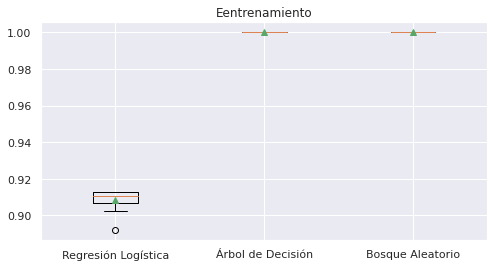

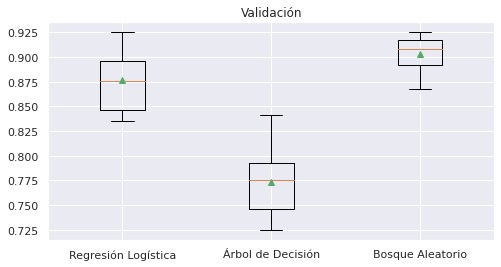

In [ ]:
# Diagrama de caja y bigotes

sns.set(rc={'figure.figsize':(8,4)})

# Entrenamiento
recall_r = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  recall_r.append(rr)
plt.boxplot(recall_r, labels = nombres, showmeans = True)
plt.title('Entrenamiento')
plt.show()

# Validación
recall_r = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  recall_r.append(rr)
plt.boxplot(recall_r, labels = nombres, showmeans = True)
plt.title('Validación')
plt.show()

#**Ejercicio-5.**

# Inciso D

In [86]:
# Conjuntos de validación y prueba
# X_train, X_val, y_train, y_val

# Estimador para GridSearchCV
est = RandomForestClassifier()
#mi_pipeCV = Pipeline(steps=[("preprocess", columnasTransformer),("model", est)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Parametros para GridSearchCV
# Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
param_grid = { 
    'ccp_alpha': [0, 0.001, 0.005, 0.008, 0.0001],
    'max_depth' : [8,9,10,11,12,13,15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2,3,4,5],
    'class_weight': ['balanced','balanced_subsample',None],
    'bootstrap': [True,False],
    'oob_score': [True,False],
    'random_state': [11,12,13,15,19]
}

# Aplicamos GridSearchCV a Rfc
#CV_rfc = GridSearchCV(estimator=est, param_grid=param_grid, cv= 5)
CV_rfc = GridSearchCV (estimator =  est, 
                       param_grid = param_grid,
                       scoring = make_scorer(mi_recall),
                       cv = mi_kfoldCV)

Justificación:
*   Valores de Alpha...
*   Elemento de lista



In [89]:
# Aplicamos nuestra transformación al conjunto de prueba
Xx = columnasTransformer.fit_transform(X_train)

In [ ]:
# Medimos el modelo con GridSearchCV
CV_rfc.fit(Xx, np.ravel(y_train))

In [ ]:
# Obtenemos la lista de mejores parámetros
CV_rfc.best_params_

{'model__ccp_alpha': 0.0001,
 'model__class_weight': 'balanced_subsample',
 'model__criterion': 'entropy',
 'model__max_depth': 8,
 'model__min_samples_split': 5}

In [ ]:
# Obtenemos el mejor score de GridSearchCV
CV_rfc.best_score_

0.8360431679624223

In [ ]:
# Aplicamos nuestra transformación al conjunto de validación
#XxV = columnasTransformer.fit_transform(X_val)

In [88]:
CV_rfc.score(X_val, np.ravel(y_val))

NotFittedError: ignored

In [ ]:
# Construimos RandomForest con los parámetros sugeridos

# rfc2 = RandomForestClassifier(     ccp_alpha=CV_rfc.best_params_.get('model__ccp_alpha'),
#                                    class_weight=CV_rfc.best_params_.get('model__class_weight'),
#                                    criterion=CV_rfc.best_params_.get('model__criterion'),   # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
#                                    max_depth=CV_rfc.best_params_.get('model__max_depth'), # Depth=k : máximo 2^k líneas/ramas.        
#                                    min_samples_split = CV_rfc.best_params_.get('model__min_samples_split'),  # mínimo de puntos muestrales requeridos en un nodo para hacer la ramificación. Puede ser fracción de 0 a 1.                                   
#                                    bootstrap=True,  # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
#                                    oob_score=True  # en caso de utilizar Out-of-bag samples.                                   
#                                    ,random_state=19
#                               )   
 

In [ ]:
# Construimos RandomForest con los parámetros sugeridos
rfc2 = CV_rfc.best_estimator_

In [ ]:
# Medimos el modelo con nuestros datos previamente transformados
clf2 = rfc2.fit(Xx, np.ravel(y_train))

In [ ]:
print("Score promedio: %.3f" % clf2.score(X_val, np.ravel(y_val)))  # es la Exactitud (accuracy)

Score promedio: 0.753


In [ ]:
y_pred = clf2.predict(X_val)
print("Recall promedio: %.3f" % mi_recall(y_val,y_pred))

Recall promedio: 0.796


# Inciso E

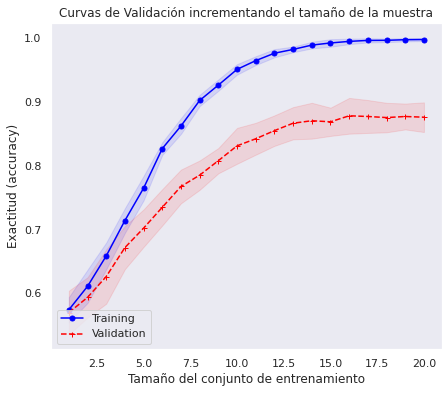

In [ ]:
# Omitimos los warnings de scikitlearn
import warnings
warnings.filterwarnings("ignore")

# -----
delta_max_depth = np.linspace(1, 20, 20) #Se definen 20 puntos en la partición, con 20 valores entre el 1 y el 20
tr_scores, val_scores = validation_curve(estimator = rfc2 , # modelo con los mejores parámetros   
                                                        X = Xx,
                                                        y = np.ravel(y_train),                                                        
                                                        param_name="max_depth",
                                                        param_range = delta_max_depth,
                                                        cv = mi_kfold ,
                                                        scoring=make_scorer(mi_recall)) # Usamos nuestra función de recall

# Hacemos la gráfica
train_mean = np.mean(tr_scores, axis=1) 
train_std = np.std(tr_scores, axis=1) 
val_mean = np.mean(val_scores, axis=1) 
val_std = np.std(val_scores, axis=1)

# Graficamos las curvas de Validación incluyendo una región indicando la desviación estándar. 
plt.figure(figsize=(7,6)) 
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training') 
plt.fill_between(delta_max_depth, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
plt.plot(delta_max_depth, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
plt.fill_between(delta_max_depth, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
plt.title('Curvas de Validación incrementando el tamaño de la muestra') 
plt.xlabel('Tamaño del conjunto de entrenamiento') 
plt.ylabel('Exactitud (accuracy)') 
plt.grid() 
plt.legend(loc='lower left') 
plt.show()





#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**